In [4]:
# ! pip install fastai

Note: you may need to restart the kernel to use updated packages.


& was unexpected at this time.


In [16]:
# load all the required modules
import fastai
from fastai import *
from fastai.vision.all import *
from pathlib import Path
from tqdm import tqdm

In [17]:
path =Path(".")

In [5]:
path.ls()

(#6) [Path('.c'),Path('.ipynb_checkpoints'),Path('Data'),Path('Data_Preprocessing.ipynb'),Path('Fastai_bentoml.ipynb'),Path('image')]

In [6]:
files = get_image_files(path/"image")

In [7]:
len(files)

1412

In [8]:
files[0]

Path('image/test/buoy/boat-water-bird-beach-sand-2840152.jpg')

In [9]:
ROOT ="./image"

In [12]:
os.listdir(ROOT)

['.ipynb_checkpoints', 'test', 'train', 'val']

In [18]:
data = ImageDataLoaders.from_folder(path=ROOT,
                                  train='train',
                                  valid='val',
                                  test='test',
                                  item_tfms=Resize(460),
                                  batch_tfms=aug_transforms(size=224) ,) 

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [19]:
data.c

7

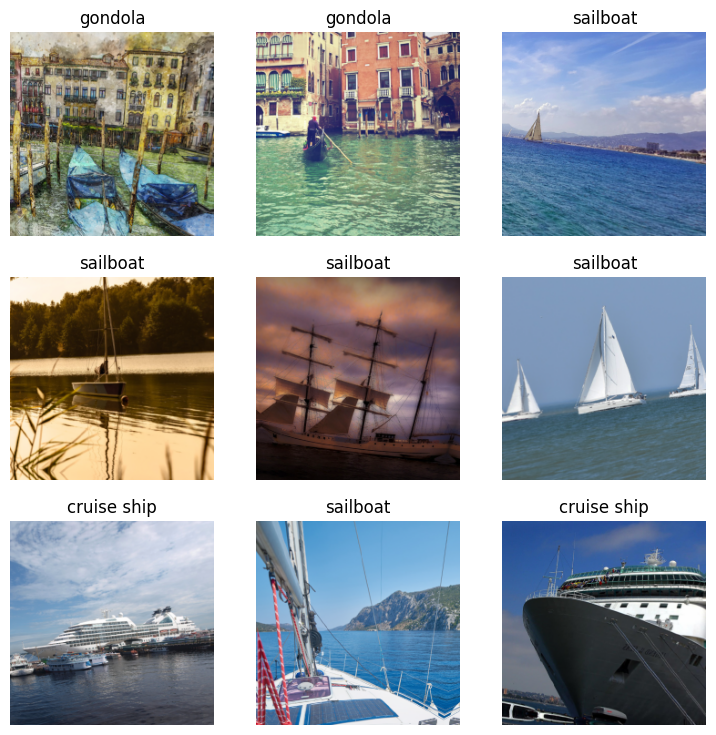

In [20]:
data.show_batch()

In [21]:
learner = vision_learner(data, resnet50, metrics=[accuracy,error_rate])

c:\Users\nayak\anaconda3\envs\bentoml\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\nayak\anaconda3\envs\bentoml\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\nayak/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:07<00:00, 14.5MB/s]


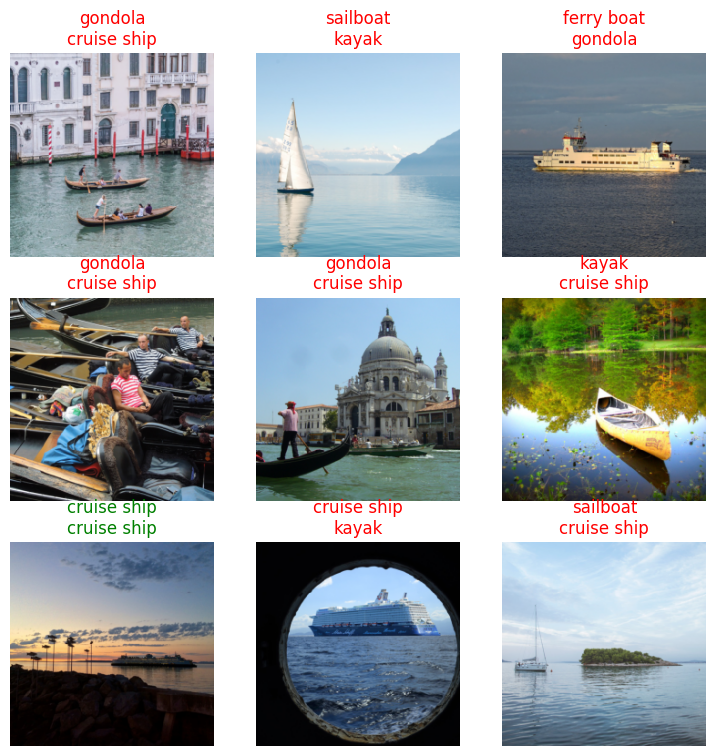

In [22]:
learner.show_results()

In [23]:
learner.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.560415,0.565818,0.879859,0.120141,03:47


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.468057,0.397716,0.901060,0.098940,04:26


In [13]:
from fastai.test_utils import show_install
show_install()



```text
=== Software === 
python        : 3.9.12
fastai        : 2.7.9
fastcore      : 1.5.26
fastprogress  : 1.0.3
torch         : 1.12.1+cu102
nvidia driver : 511.65
torch cuda    : 10.2 / is available
torch cudnn   : 7605 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : NVIDIA GeForce GTX 1650

=== Environment === 
platform      : Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.31
distro        : #1 SMP Fri Apr 2 22:23:49 UTC 2021
conda env     : /home/plaban/anaconda3
python        : /home/plaban/anaconda3/bin/python
sys.path      : /mnt/c/Users/nayak/Documents/boat_classification
/home/plaban/anaconda3/lib/python39.zip
/home/plaban/anaconda3/lib/python3.9
/home/plaban/anaconda3/lib/python3.9/lib-dynload

/home/plaban/anaconda3/lib/python3.9/site-packages
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diag

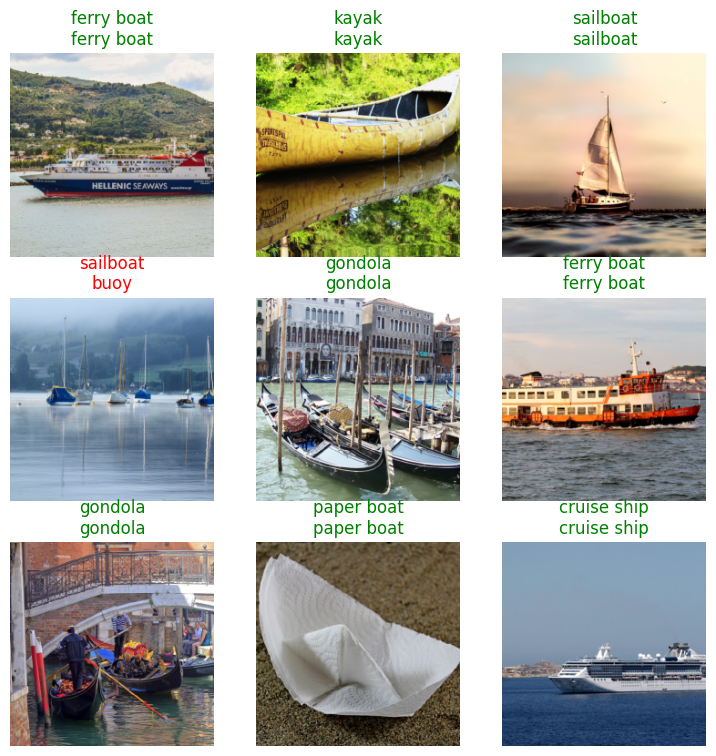

In [24]:
learner.show_results()

## Save the fastai model

In [25]:
learner.path

Path('image')

In [32]:
model_path = 'boat_model.pkl'
print(model_path)

boat_model.pkl


In [33]:
learner.export(model_path)

#### Load the saved model

In [34]:
 p = learner.path
 loaded_learner = load_learner(p/'boat_model.pkl')

In [49]:
# load all the files in a dir
files = get_image_files('./image/test')
print('number of Files for inference: ', len(files))

# make the test dataloader
dl = loaded_learner.dls.test_dl(files)
print(dl)

number of Files for inference:  282


In [51]:
# perform the predictions
preds = loaded_learner.get_preds(dl=dl)

In [67]:
len(preds)

2

#### Get the predicted values

In [71]:
test_preds_all = np.argmax(preds[0], axis=1)

In [72]:
test_preds_all

TensorBase([0, 4, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
            1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 6, 1, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2,
            2, 2, 2, 3, 2, 2, 2, 2, 6, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
            3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 4, 4, 6, 4, 4, 0, 0, 4, 4, 4, 4,
            4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 5, 5, 0, 6, 5,
            5, 6, 2, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6,
            6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
            6, 6, 6, 6, 6, 6

In [73]:
import bentoml
bentoml.fastai.save_model("boat_classification", learner)

Model(tag="boat_classification:sxpuunbr5sqtzjcc", path="C:\Users\nayak\bentoml\models\boat_classification\sxpuunbr5sqtzjcc\")

#### To verify that the saved learner can be loaded properly:

In [77]:
# load all the files in a dir
files = get_image_files('./image/test/paper boat')
print('number of Files for inference: ', len(files))

# make the test dataloader
dl = loaded_learner.dls.test_dl(files)
print(dl)

number of Files for inference:  8


In [79]:
preds = loaded_learner.get_preds(dl=dl)

In [82]:
learner = bentoml.fastai.load_model("boat_classification:latest")

preds = learner.get_preds(dl=dl)

In [83]:
test_preds_all = np.argmax(preds[0], axis=1)

In [84]:
test_preds_all 

TensorBase([5, 6, 5, 5, 0, 6, 5, 5])

In [101]:
# Put your model in eval model
learner.model.eval();

# Export your model (by default your model will be exported to `export.pkl`)
learner.export()

## Alternatively, if you want to give the exported file a name

# my_custom_filename = "a_filename_to_remember.pkl"

# learn.export(my_custom_filename)

#### Seeme.ai deployment

In [3]:
from seeme import Client

client = Client()

In [4]:
my_password =  "Beautiful1981#"
my_username =  "plaban81"
my_email =  "nayakpplaban@gmail.com"
my_firstname =  "Plaban"
my_name =  "Plaban Nayak"

client.register(
  username=my_username,
  email=my_email,
  password=my_password,
  firstname=my_firstname,
  name=my_name
)

ValueError: Error registering the new user.Please try again.

In [5]:
client.login(my_username, my_password)

{'id': '58de0b1c-811f-4fed-b832-1b22ffa44305',
 'username': 'plaban81',
 'name': 'Plaban Nayak',
 'email': 'nayakpplaban@gmail.com',
 'firstname': 'Plaban',
 'apikey': 'e67e6fe9-1860-4a4c-a101-90eb6b6d1c6a'}

#### Export your model for deployment

In [6]:
import torch
import fastai

# Get the application_id for your framework (version).
application_id = client.get_application_id(
  base_framework="pytorch",
  framework="fastai",
  base_framework_version=str(torch.__version__), # or pass the version like a string: "1.6.0"
  framework_version=str(fastai.__version__), # or pass the version like a string: "0.0.26"
  application="image_classification"
)

c:\Users\nayak\anaconda3\envs\bentoml\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
model_name = "Sailboat Classification Model"
description = "Created to classify different types of sailboats"
classes ="boats,buoy,cruise ship,ferry boat,freight boat,gondola,inflatable boat,kayak,paper boat,sailboat"
my_model = client.create_full_model({
    "name": model_name,
    "description": description,
    "classes": classes,
    "application_id": application_id
})

In [8]:
from pprint import pprint
pprint(client.applications)

[{'application': 'ocr',
  'base_framework': 'tesseract',
  'base_framework_version': '5.0.0',
  'can_convert_to_coreml': False,
  'can_convert_to_onnx': False,
  'can_convert_to_tensorflow': False,
  'can_convert_to_tflite': False,
  'created_at': '2022-05-10T12:41:52.466149+02:00',
  'description': '',
  'framework': '',
  'framework_version': '',
  'has_labels_file': False,
  'id': '290a320d-b2a2-46e3-9ed7-8f66379b2245',
  'inference_extensions': 'traineddata',
  'inference_host': 'ocr-tesseract-5-0-0',
  'name': '',
  'updated_at': '2022-05-10T12:41:52.466149+02:00'},
 {'application': 'ocr',
  'base_framework': 'tesseract',
  'base_framework_version': '5.0.1',
  'can_convert_to_coreml': False,
  'can_convert_to_onnx': False,
  'can_convert_to_tensorflow': False,
  'can_convert_to_tflite': False,
  'created_at': '2022-05-10T12:41:52.466149+02:00',
  'description': '',
  'framework': '',
  'framework_version': '',
  'has_labels_file': False,
  'id': 'ced0bb90-2aae-45f3-b338-86bd2a2a5c

In [9]:
# Or, if you exported the model with a custom filename
client.upload_model(
  my_model["id"],
  folder="./image/",
  filename="export.pkl"
)

{'id': 'ae7e041e-6f9f-440b-8e7c-b28d36007c5a',
 'created_at': '2022-09-12T13:24:29.068381+02:00',
 'updated_at': '2022-09-12T13:28:37.939626541+02:00',
 'name': '',
 'description': '',
 'model_id': 'd29359ad-4abd-466e-9384-ed980fa5cd13',
 'classes': '',
 'accuracy': 0,
 'user_id': '58de0b1c-811f-4fed-b832-1b22ffa44305',
 'can_inference': True,
 'has_logo': False,
 'logo': '',
 'config': '',
 'application_id': 'acf26cf4-e19f-425e-b5cb-031830a46df4',
 'version': '1.0',
 'version_number': 1,
 'has_ml_model': True,
 'has_onnx_model': True,
 'has_tflite_model': True,
 'has_labels_file': True,
 'dataset_version_id': '',
 'training_request_id': '',
 'metrics': None}

#### Python SDK - Make inferences calling Seeme.ai

In [14]:
image_location = "./image/test/cruise ship/aidaluna-warnemnde-germany-cruise-ship--1435536.jpg"

result = client.inference(my_model["id"], image_location)

In [15]:
result

{'id': '8e355ec2-6e2b-4df8-8117-426eae9f2e1e',
 'created_at': '2022-09-12T13:41:18.064622797+02:00',
 'updated_at': '2022-09-12T13:41:18.158214343+02:00',
 'name': 'aidaluna-warnemnde-germany-cruise-ship--1435536.jpg',
 'description': '',
 'prediction': 'cruise ship',
 'confidence': 0.999995,
 'model_id': 'd29359ad-4abd-466e-9384-ed980fa5cd13',
 'model_version_id': 'ae7e041e-6f9f-440b-8e7c-b28d36007c5a',
 'extension': 'jpg',
 'user_id': '58de0b1c-811f-4fed-b832-1b22ffa44305',
 'error_reported': False,
 'error': '',
 'application_id': 'acf26cf4-e19f-425e-b5cb-031830a46df4',
 'inference_host': 'image-pt-1-12-1-fa-2-7-9',
 'inference_time': '91.092034ms',
 'end_to_end_time': '',
 'dataset_item_id': '',
 'result': '',
 'inference_items': None,
 'hidden': False,
 'privacy_enabled': False,
 'config': '{}'}

In [16]:
image_location = "./image/test/paper boat/origami-paper-sailing-sailboat-1067673.jpg"

result = client.inference(my_model["id"], image_location)
result

{'id': '15d521a4-3bc0-4016-9b2f-d7dcd8767d19',
 'created_at': '2022-09-12T14:07:00.736482596+02:00',
 'updated_at': '2022-09-12T14:07:00.833962965+02:00',
 'name': 'origami-paper-sailing-sailboat-1067673.jpg',
 'description': '',
 'prediction': 'paper boat',
 'confidence': 0.99613416,
 'model_id': 'd29359ad-4abd-466e-9384-ed980fa5cd13',
 'model_version_id': 'ae7e041e-6f9f-440b-8e7c-b28d36007c5a',
 'extension': 'jpg',
 'user_id': '58de0b1c-811f-4fed-b832-1b22ffa44305',
 'error_reported': False,
 'error': '',
 'application_id': 'acf26cf4-e19f-425e-b5cb-031830a46df4',
 'inference_host': 'image-pt-1-12-1-fa-2-7-9',
 'inference_time': '95.63175ms',
 'end_to_end_time': '',
 'dataset_item_id': '',
 'result': '',
 'inference_items': None,
 'hidden': False,
 'privacy_enabled': False,
 'config': '{}'}

result